In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
#cleaning data
listing_db = pd.read_csv('listings.csv.gz')

In [3]:
listing_db = listing_db[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

In [8]:
#extracting
listing_db.fillna(0, inplace=True)
price = listing_db['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

listing_db['price']=prices
#exclude the price = 0 
listing_db = listing_db[listing_db.bathrooms >0]
listing_db = listing_db[listing_db.bedrooms > 0]
listing_db = listing_db[listing_db.beds > 0]
listing_db = listing_db[listing_db.price  > 0]
listing_db = listing_db[listing_db.review_scores_rating  > 0]
listing_db = listing_db[listing_db.reviews_per_month > 0]
listing_db = listing_db[listing_db.accommodates  > 0]
listing_db.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,1078,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,-97.73674,30.30123,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,t,"Hyde Park is close to downtown, UT, 6th street...",78705,...,Entire home/apt,2,1.0,1.0,1.0,1.70,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",flexible,221,85.0
1,2265,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,-97.71398,30.27750,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,f,0,78702,...,Entire home/apt,4,2.0,2.0,2.0,0.19,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,24,225.0
2,5245,"Green, Colorful, Clean & Cozy home",0,-97.71379,30.27577,Situated in a vibrant & diverse multicultural ...,Situated in a vibrant & diverse multicultural ...,f,0,78702,...,Private room,2,1.0,1.0,1.0,0.07,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,9,100.0
3,5456,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,-97.73448,30.26112,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,f,My neighborhood is ideally located if you want...,78702,...,Entire home/apt,3,1.0,1.0,2.0,3.88,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",strict_14_with_grace_period,481,95.0
4,5769,NW Austin Room,0,-97.78370,30.45596,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,f,Quiet neighborhood with lots of trees and good...,78729,...,Private room,2,1.0,1.0,1.0,2.22,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,246,40.0


In [11]:

# Categorizing differernt listings based on room_type

roomType_db=listing_db.groupby('room_type').id.count()
roomType_db=roomType_db.reset_index()
roomType_db=roomType_db.rename(columns={'id':'number_of_listings'})
roomType_db

,room_type,number_of_listings
0,Entire home/apt,6203
1,Private room,2168
2,Shared room,137


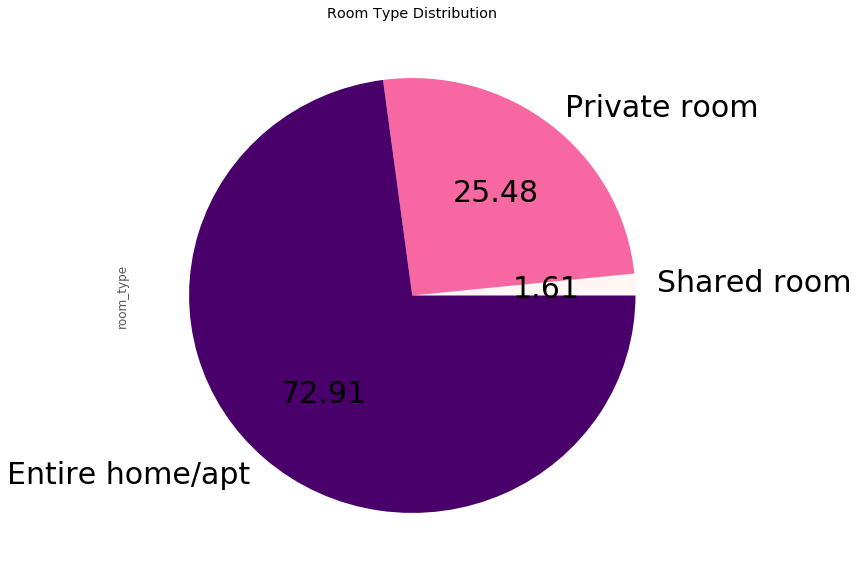

In [24]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = listing_db.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'RdPu', 
                 figsize=(10,10), 
                 fontsize = 30, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0,0.5,'Number of listings')

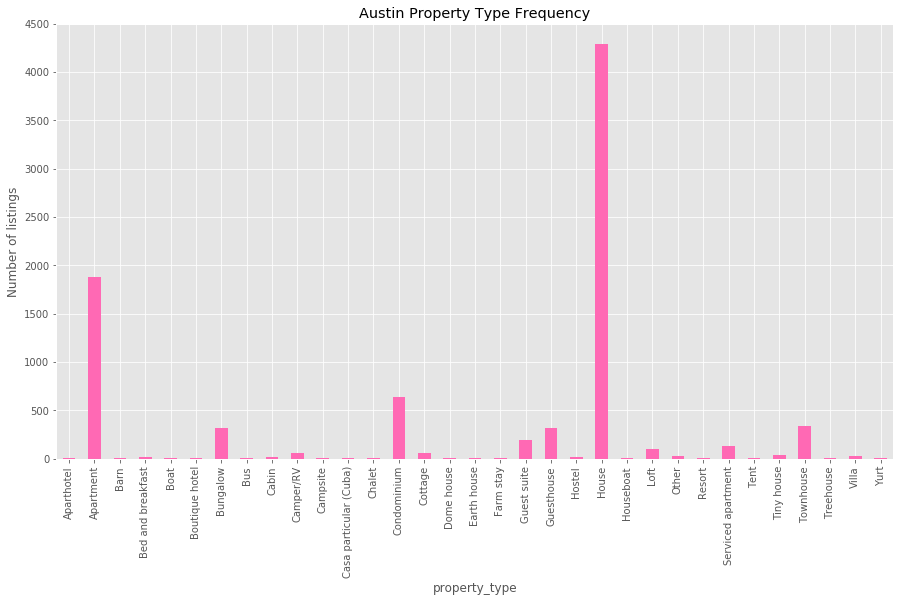

In [26]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = listing_db.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = 'hotpink', 
           figsize =(15,8), 
           title = 'Austin Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

People in Austin are more inclinded towards listing their house, apartments than other type of properties. Other types are Bungalow, Condominium, townhouse and Guesthouse. 

In [27]:

# analyzing the prices for different room type and property type

roomProperty_DF = listing_db.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
64,Villa,Entire home/apt,959.347826
3,Apartment,Entire home/apt,534.576975
1,Aparthotel,Private room,527.428571
29,Dome house,Entire home/apt,500.000000
51,Resort,Entire home/apt,499.250000


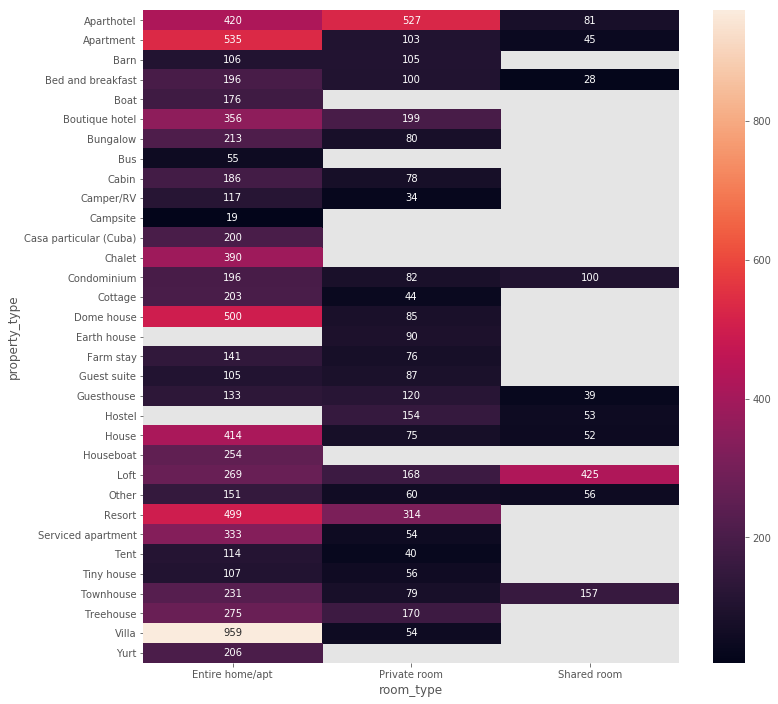

In [35]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(listing_db.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")


This chart allows us to see all the listings' prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in Boston based on property and room types. This can be analyzed that most of property type, the price for entire  house/apartment in Austin are in mid range from $250 to $500, except Villa type is extremly high ($950). The price for share room and private room are low and almost similar.  

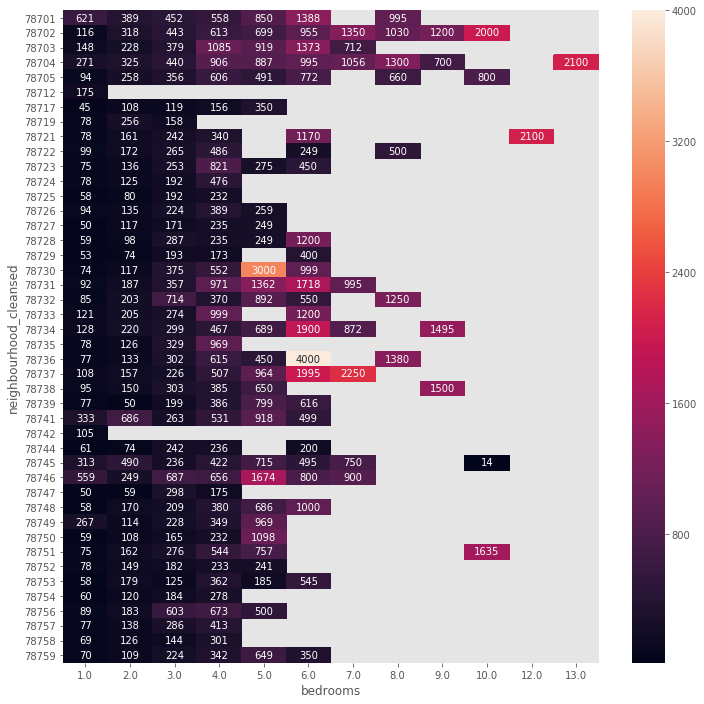

In [38]:
# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(listing_db.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

It can be analyzed that with the increase in the number of bedrooms price of listing increases, especially house with 4 bedrooms or above. Although, it depends upon the zipcode as well.

So the analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood.It can be seen that the property in zipcode 78730, 78737 and the listing as the type as entire house has highest price. 

In [39]:
summaryDF = listing_db[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
7078,Beautiful four bedroom/ three full bath home i...,10900.0
11396,Experience Austin just across Lady Bird Lake f...,10000.0
11292,"Garrison, by WanderJaunt Travel to Austin in L...",10000.0
11474,Experience Austin just across Lady Bird Lake f...,10000.0
11540,Travel to Austin in Luxury with this WanderJau...,10000.0


In [41]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/linhduong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linhduong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
#import nltk
#nltk.download('wordnet')
  

In [ ]:
#sudo python -m nltk.downloader -d /usr/local/share/nltk_data all

In [47]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import word_tokenize

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'beautiful four bedroom/ three full bath home iconi'

In [50]:
!pip install wordcloud

     |████████████████████████████████| 163kB 2.7MB/s eta 0:00:01


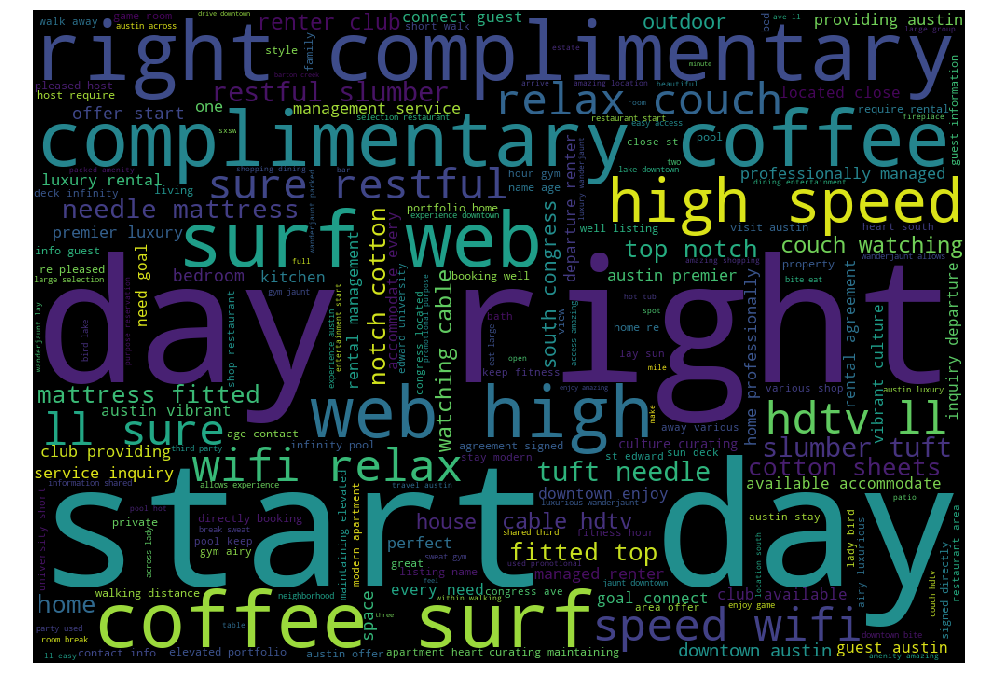

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


The unique words are high speed internet, complimentary coffee, restfull.
So if hosts are not able to attract too many travellers then they can add these keywords to their summaries in order to attract travellers to choose their listings.

In [52]:
#Analyzing what amenities costs more ?
import re

amenitiesDF = listing_db[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

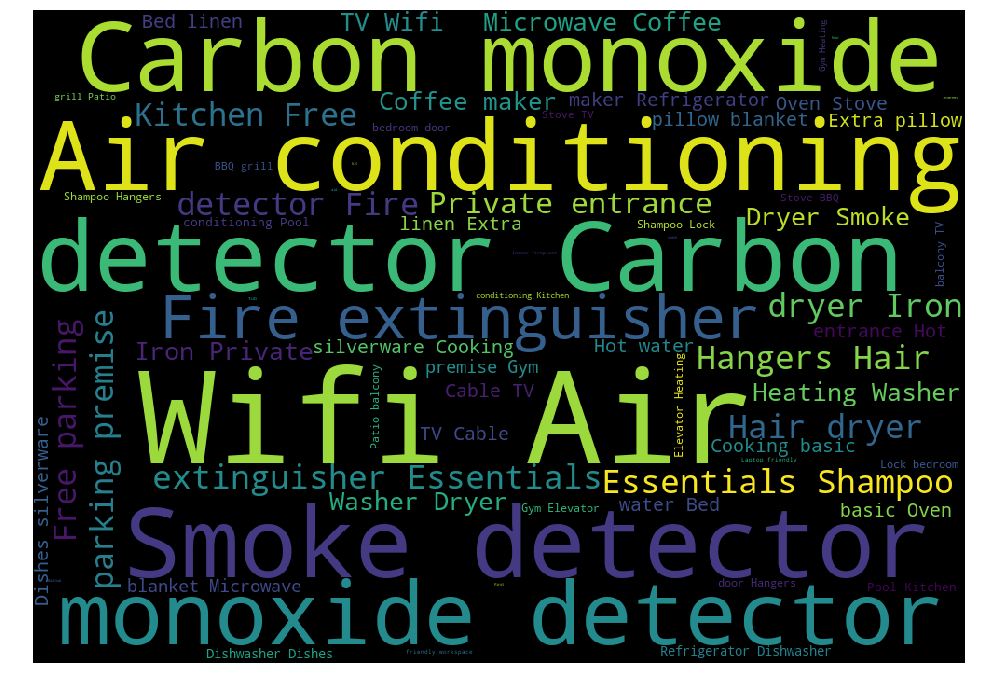

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

All emenities words are Carbon monoxide, air conditioning, detector carbon , wifi air, essential shampoo, smoke detector, monoxide detector, private entrance 

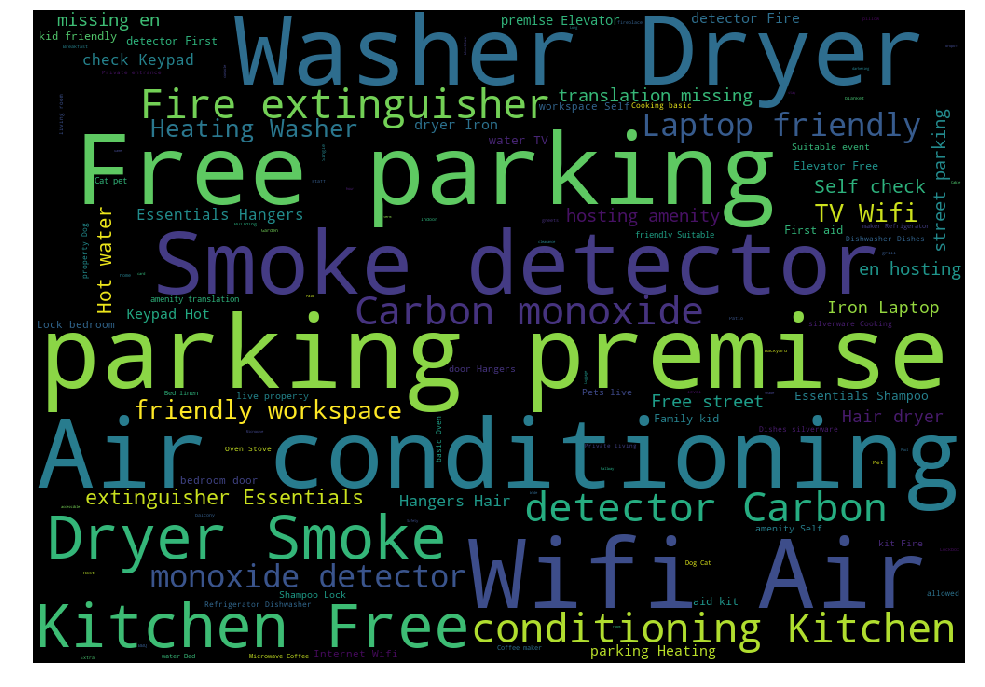

In [54]:
amenitiesDFbott =amenitiesDF.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(30)

allemenitiesb = ''
for index,row in amenitiesDFbottom.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenitiesb+=p

allemenities_datab=nltk.word_tokenize(allemenitiesb)
filtered_datab=[word for word in allemenities_datab if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_datab=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_datab)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be clearly seen that listings with higher prices have extra eminities such as Air conditioning, washer/dryer, free parking, wifi air, kitchen free and conditioning kitchen 

It can be concluded that prices of listings depends upon following factors:

1) The type of room chosen by the traveller and mostly booking an Entire property costs maximum followed by private room and shared apartment.

2) The type of property chosen by the traveller and it can be analyzed that Villa, apartment and houses are the properties with maximum prices and apartments, houses take up an overwhelming majority of all listings.

3) Price of a listing also depends upon the number of bedrooms the property have and the same also depends upon the neighborhood of the property

4) the summary section is the one which helps to attract travellers and analyzed that presence of unique words like home, high speed internet, complimentary coffee, restfulllocated words tends to attract more travellers

5) with the increase in prices the eminities provided by host also increases.